In [2]:
import sys
import os

import sqlite3
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

sys.path.insert(0, '../src') # add library code to path

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Processing Raw Data to Lightdump

In [2]:
from wikiparser import download_metadata_zips

zip_outdir = "../data/raw/zips"

download_metadata_zips(1, zip_outdir , False)

https://dumps.wikimedia.org/enwiki/20200401/enwiki-20200401-stub-meta-history1.xml.gz


In [3]:
zips = os.listdir(zip_outdir)
zips

['metadata-20200401-1.xml.gz',
 'metadata-20200101-1.xml.gz',
 'enwiki-20200101-0.7z',
 '.ipynb_checkpoints']

In [4]:
from wikiparser import gunzip_shutil

extract_outdir = "../data/raw/extracted"

for gzip_file in os.listdir(zip_outdir ):
    if gzip_file[-2:] == "gz":
        gunzip_shutil(zip_outdir + "/" + gzip_file, extract_outdir)
    

Extracted file already exists: ../data/raw/extracted/metadata-20200401-1.xml
Extracted file already exists: ../data/raw/extracted/metadata-20200101-1.xml


In [6]:
from wikiparser import parse_metadata_to_lightdump

#parse enwiki to lightdump
file_to_parse = "../data/raw/extracted/metadata-20200401-1.xml"
lightdump_filename = "popularity_dump.txt"
temp_dir = "../data/temp"
# articles = ["Aardvark", 'Blizzard_Entertainment', 'American_League_Championship_Series']
articles = []

In [7]:
parse_metadata_to_lightdump(file_to_parse, lightdump_filename, temp_dir, articles, num_articles=300, min_revisions=1000)

Writing Anarchism 19219 revisions to popularity_dump.txt
Writing Autism 10314 revisions to popularity_dump.txt
Writing Albedo 1194 revisions to popularity_dump.txt
Writing A 4715 revisions to popularity_dump.txt
Writing Alabama 9456 revisions to popularity_dump.txt
Writing Achilles 7138 revisions to popularity_dump.txt
Writing Academy_Award_for_Best_Production_Design 1211 revisions to popularity_dump.txt
Writing Academy_Awards 8129 revisions to popularity_dump.txt
Writing Altruism 2252 revisions to popularity_dump.txt
Writing Ayn_Rand 11937 revisions to popularity_dump.txt
Writing Algeria 10518 revisions to popularity_dump.txt
Writing List_of_Atlas_Shrugged_characters 1019 revisions to popularity_dump.txt
Writing Alchemy 6274 revisions to popularity_dump.txt
Writing Alien 4506 revisions to popularity_dump.txt
Writing Astronomer 1541 revisions to popularity_dump.txt
Writing ASCII 3667 revisions to popularity_dump.txt
Writing Animation 7414 revisions to popularity_dump.txt
Writing Apollo

Writing Alfonso_Cuarón 1350 revisions to popularity_dump.txt
Writing Antoninus_Pius 1121 revisions to popularity_dump.txt
Writing August_3 2822 revisions to popularity_dump.txt
Writing Advanced_Encryption_Standard 2037 revisions to popularity_dump.txt
Writing Analytical_Engine 1002 revisions to popularity_dump.txt
Writing Augustus 6832 revisions to popularity_dump.txt
Writing List_of_governors_of_Alabama 1017 revisions to popularity_dump.txt
Writing Apocrypha 1556 revisions to popularity_dump.txt
Writing Antarctic_Treaty_System 1555 revisions to popularity_dump.txt
Writing Ames,_Iowa 1430 revisions to popularity_dump.txt
Writing Abalone 1419 revisions to popularity_dump.txt
Writing Arminianism 1267 revisions to popularity_dump.txt
Writing The_Alan_Parsons_Project 1285 revisions to popularity_dump.txt
Writing Antimatter 3395 revisions to popularity_dump.txt
Writing April_16 3439 revisions to popularity_dump.txt
Writing Americans_with_Disabilities_Act_of_1990 1741 revisions to popularity

Writing Andrew_Wiles 1571 revisions to popularity_dump.txt
Writing Delian_League 1120 revisions to popularity_dump.txt
Writing Ares 7397 revisions to popularity_dump.txt
Writing Alexander_Grothendieck 1550 revisions to popularity_dump.txt
Writing Alcoholics_Anonymous 8111 revisions to popularity_dump.txt
Writing Array_data_structure 1231 revisions to popularity_dump.txt
Writing Advance_Australia_Fair 1707 revisions to popularity_dump.txt
Writing Amerigo_Vespucci 3358 revisions to popularity_dump.txt
Writing Auguste_Rodin 1783 revisions to popularity_dump.txt
Writing Talk:HIV/AIDS 4359 revisions to popularity_dump.txt
Writing Act_of_Settlement_1701 1073 revisions to popularity_dump.txt
Writing Aircraft_hijacking 1366 revisions to popularity_dump.txt
Writing Acropolis_of_Athens 2336 revisions to popularity_dump.txt
Writing Adam_Weishaupt 1585 revisions to popularity_dump.txt
Writing Auguste_and_Louis_Lumière 1032 revisions to popularity_dump.txt
Writing Acts_of_the_Apostles 1982 revision

# Visualize Lightdump Article Byte Size

Starting Lightdump Parse for: American_League_Championship_Series
Finished Lightdump Parse => num revisions: 812
Saving plot to "../data/out/American_League_Championship_Series.png"


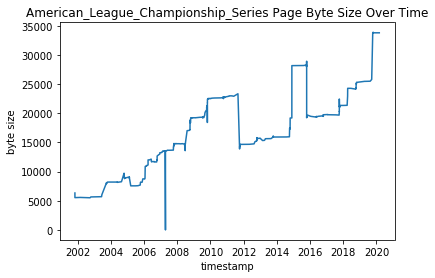

In [7]:
from engagement_score import create_wiki_graph

fig1 = create_wiki_graph("../data/temp/popularity_dump.txt", 'American_League_Championship_Series', "../data/out")

Starting Lightdump Parse for: Blizzard_Entertainment
Saving plot to "../data/out/Blizzard_Entertainment.png"


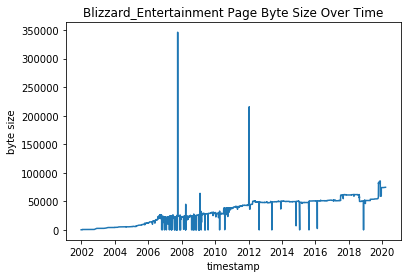

In [8]:
fig2 = create_wiki_graph("../data/temp/popularity_dump.txt", "Blizzard_Entertainment", "../data/out")

# Lightdump to DB Averaged by Month

In [9]:
#American_Football_Conference

In [9]:
from engagement_score import lightdump_to_db

lightdump_file = "../data/temp/popularity_dump.txt"
outfile = "../data/out/articles.db"
lightdump_to_db(lightdump_file, outfile)


0: FINISHED LIGHTDUMP PARSE FOR:   Anarchism		 NUM REVISIONS: 19218
1: FINISHED LIGHTDUMP PARSE FOR:   Autism		 NUM REVISIONS: 10313
2: FINISHED LIGHTDUMP PARSE FOR:   Albedo		 NUM REVISIONS: 1193
3: FINISHED LIGHTDUMP PARSE FOR:   A		 NUM REVISIONS: 4714
4: FINISHED LIGHTDUMP PARSE FOR:   Alabama		 NUM REVISIONS: 9455
5: FINISHED LIGHTDUMP PARSE FOR:   Achilles		 NUM REVISIONS: 7137
6: FINISHED LIGHTDUMP PARSE FOR:   Academy_Award_for_Best_Production_Design		 NUM REVISIONS: 1210
7: FINISHED LIGHTDUMP PARSE FOR:   Academy_Awards		 NUM REVISIONS: 8128
8: FINISHED LIGHTDUMP PARSE FOR:   Altruism		 NUM REVISIONS: 2251
9: FINISHED LIGHTDUMP PARSE FOR:   Ayn_Rand		 NUM REVISIONS: 11936
10: FINISHED LIGHTDUMP PARSE FOR:   Algeria		 NUM REVISIONS: 10517
11: FINISHED LIGHTDUMP PARSE FOR:   List_of_Atlas_Shrugged_characters		 NUM REVISIONS: 1018
12: FINISHED LIGHTDUMP PARSE FOR:   Alchemy		 NUM REVISIONS: 6273
13: FINISHED LIGHTDUMP PARSE FOR:   Alien		 NUM REVISIONS: 4505
14: FINISHED LIGHTDUM

117: FINISHED LIGHTDUMP PARSE FOR:   Accordion		 NUM REVISIONS: 2791
118: FINISHED LIGHTDUMP PARSE FOR:   Anaximander		 NUM REVISIONS: 1101
119: FINISHED LIGHTDUMP PARSE FOR:   Architect		 NUM REVISIONS: 4069
120: FINISHED LIGHTDUMP PARSE FOR:   Abbreviation		 NUM REVISIONS: 1363
121: FINISHED LIGHTDUMP PARSE FOR:   Aphrodite		 NUM REVISIONS: 5706
122: FINISHED LIGHTDUMP PARSE FOR:   April_1		 NUM REVISIONS: 3818
123: FINISHED LIGHTDUMP PARSE FOR:   Aleister_Crowley		 NUM REVISIONS: 6505
124: FINISHED LIGHTDUMP PARSE FOR:   Athena		 NUM REVISIONS: 7083
125: FINISHED LIGHTDUMP PARSE FOR:   Alloy		 NUM REVISIONS: 2574
126: FINISHED LIGHTDUMP PARSE FOR:   Angle		 NUM REVISIONS: 2239
127: FINISHED LIGHTDUMP PARSE FOR:   Acoustics		 NUM REVISIONS: 1062
128: FINISHED LIGHTDUMP PARSE FOR:   American_Sign_Language		 NUM REVISIONS: 2320
129: FINISHED LIGHTDUMP PARSE FOR:   Alternate_history		 NUM REVISIONS: 2812
130: FINISHED LIGHTDUMP PARSE FOR:   Atomic_orbital		 NUM REVISIONS: 1587
131: FINI

233: FINISHED LIGHTDUMP PARSE FOR:   Antibiotic		 NUM REVISIONS: 3956
234: FINISHED LIGHTDUMP PARSE FOR:   Arnold_Schwarzenegger		 NUM REVISIONS: 10639
235: FINISHED LIGHTDUMP PARSE FOR:   Amway		 NUM REVISIONS: 4170
236: FINISHED LIGHTDUMP PARSE FOR:   Adam_Smith		 NUM REVISIONS: 7683
237: FINISHED LIGHTDUMP PARSE FOR:   Talk:Austrian_School		 NUM REVISIONS: 3449
238: FINISHED LIGHTDUMP PARSE FOR:   Antoine_Lavoisier		 NUM REVISIONS: 3997
239: FINISHED LIGHTDUMP PARSE FOR:   April_23		 NUM REVISIONS: 3575
240: FINISHED LIGHTDUMP PARSE FOR:   Amitabh_Bachchan		 NUM REVISIONS: 7994
241: FINISHED LIGHTDUMP PARSE FOR:   Allegory		 NUM REVISIONS: 1718
242: FINISHED LIGHTDUMP PARSE FOR:   Archimedes		 NUM REVISIONS: 4199
243: FINISHED LIGHTDUMP PARSE FOR:   Alternative_medicine		 NUM REVISIONS: 8392
244: FINISHED LIGHTDUMP PARSE FOR:   Approval_voting		 NUM REVISIONS: 1013
245: FINISHED LIGHTDUMP PARSE FOR:   Arizona_State_University		 NUM REVISIONS: 5124
246: FINISHED LIGHTDUMP PARSE FOR: 

# Editor Engagement Score
* Penalize only few editors making a lot of edits
* We favor lots of edits from many unique editors over lots of edits from few people
* Sum the squares
* Multiple both numbers

In [11]:
from engagement_score import selectArticlesDB

aardvark = selectArticlesDB(outfile, ["Aardvark"])
blizzard = selectArticlesDB(outfile, ['Blizzard_Entertainment'])
mlb_alcs = selectArticlesDB(outfile, ['American_League_Championship_Series'])

SELECT * FROM ARTICLES WHERE article_title="Aardvark"
SELECT * FROM ARTICLES WHERE article_title="Blizzard_Entertainment"
SELECT * FROM ARTICLES WHERE article_title="American_League_Championship_Series"


In [12]:
mlb_alcs.head()

,timestamp,avg_bytes,edits,nunique_editors,article_title
0,2001-11-30,5544.0,1,1,American_League_Championship_Series
1,2001-12-31,0.0,0,0,American_League_Championship_Series
2,2002-01-31,0.0,0,0,American_League_Championship_Series
3,2002-02-28,5577.0,1,1,American_League_Championship_Series
4,2002-03-31,0.0,0,0,American_League_Championship_Series


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from engagement_score import editor_engagement_score

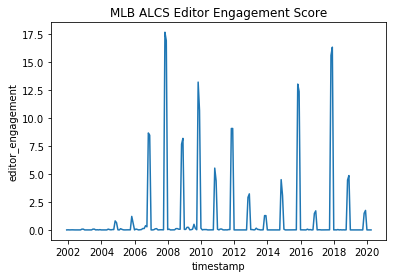

In [14]:
mlb_df = editor_engagement_score(mlb_alcs, '../data/out')
ax = sns.lineplot(x='timestamp', y='editor_engagement', data=mlb_df)
ax.set_title("MLB ALCS Editor Engagement Score")
plt.show()

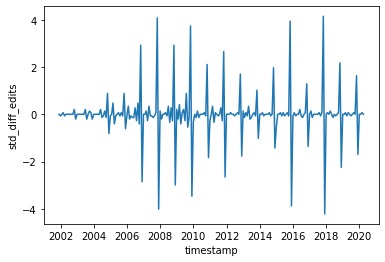

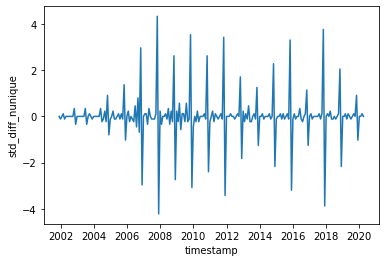

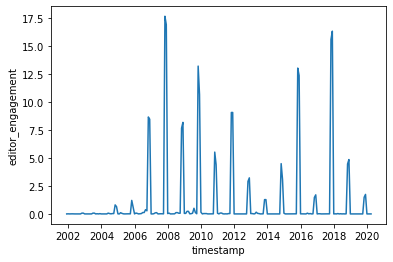

In [15]:
ax = sns.lineplot(x='timestamp', y='std_diff_edits', data=mlb_df)
plt.show()
ax = sns.lineplot(x='timestamp', y='std_diff_nunique', data=mlb_df)
plt.show()
ax = sns.lineplot(x='timestamp', y='editor_engagement', data=mlb_df)
plt.show()

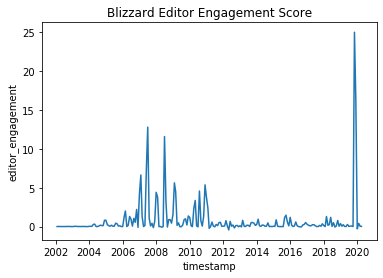

In [16]:
blizzard_df = editor_engagement_score(blizzard, '../data/out')
ax = sns.lineplot(x='timestamp', y='editor_engagement', data=blizzard_df)
ax.set_title("Blizzard Editor Engagement Score")
plt.show()

Writing Page View Data to -- ../data/temp/pageviews.csv


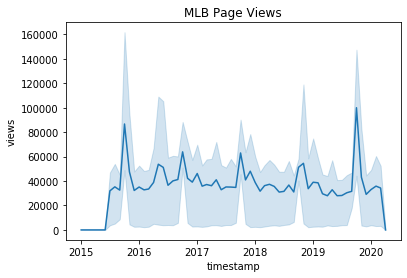

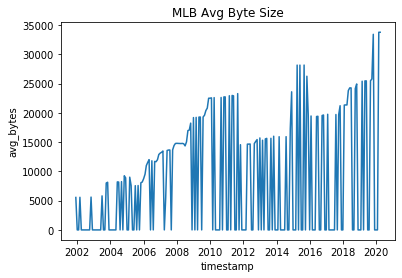

In [17]:
from engagement_score import get_page_views

articles = ["Aardvark", 'Blizzard_Entertainment', 'American_League_Championship_Series']

pageviews_outfile = temp_dir + "/pageviews.csv"
    
views_df = get_page_views(articles, pageviews_outfile)

views_df[views_df["article_title"] == 'American_League_Championship_Series']

ax = sns.lineplot(x='timestamp', y='views', data=views_df)
ax.set_title("MLB Page Views")
plt.show()

ax = sns.lineplot(x='timestamp', y='avg_bytes', data=mlb_alcs)
ax.set_title("MLB Avg Byte Size")
plt.show()

In [18]:
from engagement_score import content_engagement_score

db_outfile = "../data/out/articles.db"
pageviews_outfile = "../data/temp/pageviews.csv"
output_dir = "../data/out"

content_score = content_engagement_score(pageviews_outfile, db_outfile, output_dir + "/content_engagement.csv")
content_score.head()

Writing Content Engagement Score to -- ../data/out/content_engagement.csv


,article_title,timestamp,content_engagement
0,Aardvark,2015-08-01,0.004713
1,Aardvark,2015-09-01,-0.215383
2,Aardvark,2015-10-01,0.228697
3,Aardvark,2015-11-01,-0.018487
4,Aardvark,2015-12-01,0.004245


In [19]:
def article_joint_engagement(content_df, editor_df, article_name, outfile="./data/out"):
    editor_score = list(editor_df[editor_df['timestamp'] > '2015-08-01']['editor_engagement'])
    
    timestamps = list(content_df[content_df['article_title'] == article_name]['timestamp'])
    
    content_score = list(content_df[content_df['article_title'] == article_name]['content_engagement'])
    
    joint_score = [editor_score[i] * content_score[i] for i in range(len(editor_score))]
    
    df = pd.DataFrame({"article_title": [article_name for _ in range(len(joint_score))], 
                       "timestamp": timestamps,
                       "editor_score": editor_score, 
                       "content_score": content_score, 
                       "engagement_score": joint_score})
    
    df.to_csv(outfile + "/" + article_name + "-score.csv")
    
    return df

In [20]:
joint_blizzard = joint_engagement(content_score, blizzard_df, "Blizzard_Entertainment", '../data/out')

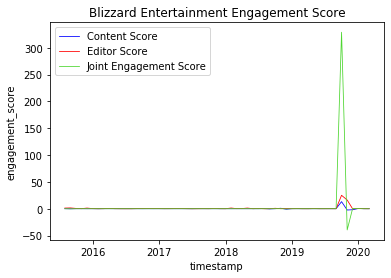

In [21]:
sns.set_context(rc={"lines.linewidth": .80})

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_blizzard, label="Content Score", color="blue")
ax.set_title("Blizzard Entertainment Content Score")

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_blizzard, label="Editor Score", color="red")
ax.set_title("Blizzard Entertainment Editor Score")

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_blizzard, label="Joint Engagement Score", color="#4FD632")

ax.set_title("Blizzard Entertainment Engagement Score")
ax.legend()

plt.show()

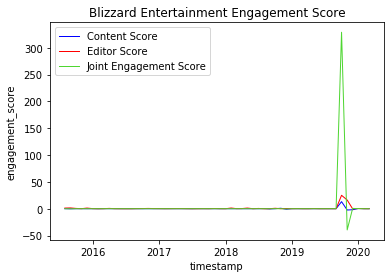

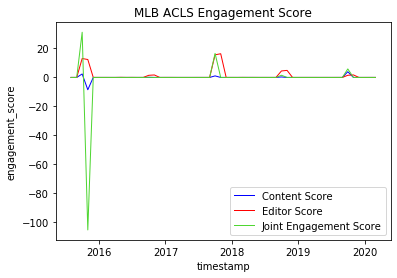

In [22]:
sns.set_context(rc={"lines.linewidth": 1.0})

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_blizzard, label="Content Score", color="blue")
ax.set_title("Blizzard Entertainment Content Score")

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_blizzard, label="Editor Score", color="red")
ax.set_title("Blizzard Entertainment Editor Score")

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_blizzard, label="Joint Engagement Score", color="#4FD632")

ax.set_title("Blizzard Entertainment Engagement Score")
ax.legend()

plt.show()

joint_mlb = joint_engagement(content_score, mlb_df, "American_League_Championship_Series", '../data/out')

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_mlb, label="Content Score", color="blue")
ax.set_title("MLB ACLS Content Score")

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_mlb, label="Editor Score", color="red")
ax.set_title("MLB ACLS Editor Score")

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_mlb, label="Joint Engagement Score", color="#4FD632")
ax.set_title("MLB ACLS Engagement Score")
ax.legend()

plt.show()

In [23]:
conn = sqlite3.connect("../data/out/engagement_scores.db")
c = conn.cursor()
joint_df = pd.concat([joint_blizzard, joint_mlb])
joint_df.to_sql('SCORES', conn, if_exists='replace', index=False)

In [12]:
joint_df

NameError: name 'joint_df' is not defined

In [55]:
from engagement_score import selectArticlesDB

outfile = "../data/out/articles.db"

df = selectArticlesDB(outfile, [])
df.head()

SELECT * FROM ARTICLES


,timestamp,avg_bytes,edits,nunique_editors,article_title
0,2001-11-30,9004.00,1,1,Anarchism
1,2001-12-31,9301.00,2,1,Anarchism
2,2002-01-31,0.00,0,0,Anarchism
3,2002-02-28,10926.25,4,3,Anarchism
4,2002-03-31,11488.00,1,1,Anarchism


In [122]:
names = list(df['article_title'].unique())
scores = []

temp_df = df

diff_edits = [df['edits'][x] - df['edits'][x-1] for x in range(1, len(df))] #works
diff_edits.insert(0,0)
temp_df['diff_edits'] = diff_edits

diff_nunique = [df['nunique_editors'][x] - df['nunique_editors'][x-1] for x in range(1, len(df))]
diff_nunique.insert(0, 0)
temp_df['diff_nunique'] = diff_nunique

outdf = pd.DataFrame(columns=['article_title', 'timestamp', 'editor_score'])

for i in range(len(names)):
    current_name = names[i]
    print(current_name)
    current_edits = df[df['article_title']==current_name]['diff_edits']
    current_nunique = df[df['article_title']==current_name]['diff_nunique']
    std_diff_edits = (current_edits - np.mean(current_edits)) / np.std(current_edits)
    std_diff_nunique = (current_nunique- np.mean(current_nunique)) / np.std(current_nunique)
    editor_score = std_diff_edits * std_diff_nunique
    article_df = pd.DataFrame({"article_title":[current_name for _ in range(len(editor_score))], "timestamp": df[df['article_title']==current_name]['timestamp'], "editor_score": editor_score})
    outdf = pd.concat([outdf, article_df])
    
outdf.to_csv('../data/out/editor_score.csv', mode='w', index=False)

Anarchism
Autism
Albedo
A
Alabama
Achilles
Academy_Award_for_Best_Production_Design
Academy_Awards
Altruism
Ayn_Rand
Algeria
List_of_Atlas_Shrugged_characters
Alchemy
Alien
Astronomer
ASCII
Animation
Apollo
Andre_Agassi
Afroasiatic_languages
Andorra
Animal_Farm
Alaska
Aldous_Huxley
Algae
Analysis_of_variance
America_the_Beautiful
Assistive_technology
Abacus
Asphalt
Apollo_11
Apollo_8
A_Modest_Proposal
Alphabet
Anatomy
Andrei_Tarkovsky
Aardvark
Adobe
Adventure
Asia
Aruba
Articles_of_Confederation
Atlantic_Ocean
Angola
Android_(robot)
Alberta
Talk:Animal
Albert_Einstein
Albania
Allah
Azerbaijan
Ampere
Talk:American_football
Mouthwash
Asteroids_(video_game)
Aries_(constellation)
Aquarius_(constellation)
Ankara
Arabic
Anaconda
Talk:Afghanistan/Archive_6
Altaic_languages
Axiom_of_choice
Attila
Aegean_Sea
A_Clockwork_Orange_(novel)
Audi
Alfred_Nobel
Alexander_Graham_Bell
Anatolia
Apple_Inc.
Andy_Warhol
Akira_Kurosawa
Ancient_Egypt
Motor_neuron_disease
ABBA
MessagePad
Anna_Kournikova
Agnostic

In [134]:
editor_score = outdf

In [135]:
editor_score

,article_title,timestamp,editor_score
0,Anarchism,2001-11-30,0.000030
1,Anarchism,2001-12-31,-0.000049
2,Anarchism,2002-01-31,0.001573
3,Anarchism,2002-02-28,0.006053
4,Anarchism,2002-03-31,0.004204
...,...,...,...
66278,AVL_tree,2019-11-30,0.000160
66279,AVL_tree,2019-12-31,0.485878
66280,AVL_tree,2020-01-31,0.069206
66281,AVL_tree,2020-02-29,-0.000000


In [104]:
article_titles = []

with open("../data/temp/article_titles.txt") as file:
    for line in file:
        article_titles.append(line.strip())

In [105]:
from engagement_score import get_page_views

pageviews_outfile = temp_dir + "/pageviews.csv"
    
views_df = get_page_views(article_titles, pageviews_outfile)

Writing Page View Data to -- ../data/temp/pageviews.csv


In [137]:
from engagement_score import content_engagement_score

db_outfile = "../data/out/articles.db"
pageviews_outfile = "../data/temp/pageviews.csv"
output_dir = "../data/out"

content_score = content_engagement_score(pageviews_outfile, db_outfile, output_dir + "/content_engagement.csv")
content_score['article_title'].nunique()

Writing Content Engagement Score to -- ../data/out/content_engagement.csv


300

In [108]:
content_score.head()

,article_title,timestamp,content_engagement
0,Anarchism,2015-08-01,0.001692
1,Anarchism,2015-09-01,0.000826
2,Anarchism,2015-10-01,0.007975
3,Anarchism,2015-11-01,0.001025
4,Anarchism,2015-12-01,-0.004076


In [133]:
editor_score

[0.00289769658985925,
 0.01055177164594165,
 0.0762327590454988,
 0.032255467409931245,
 0.029490396517558148,
 0.026387607042910478,
 0.0010428828137730975,
 -0.006627022800853422,
 0.015314131341297985,
 0.010280013724267574,
 0.005026906714043494,
 0.022086971971757664,
 0.015952630535910853,
 0.015897223581006432,
 0.034666989161485647,
 0.036329197808618326,
 0.09255934175733535,
 2.9727066949367083e-05,
 0.07558898299803787,
 -0.0036693467795268562,
 0.024424617783439496,
 0.2421264588821885,
 0.0216859311553066,
 -0.0006272411126316455,
 0.030688242114063295,
 -0.0014952834061342684,
 0.007723378519392068,
 0.004203717669749214,
 0.03900983905542279,
 0.029490396517558148,
 0.034519237281740514,
 0.00331720639127845,
 0.12580879155283703,
 0.17499697537584435,
 0.06700618184070038,
 0.002834374355682766,
 0.00018803265239057494,
 0.29067878193700697,
 0.08515064035868682,
 -0.08094357988622845,
 -0.07354807061970002,
 0.20004355741906743,
 0.09678082403576754,
 3.299355586039882

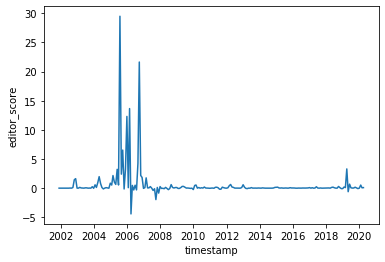

In [127]:
test = editor_score[editor_score['article_title']=="Anarchism"]
ax = sns.lineplot(x='timestamp', y='editor_score', data=test)
plt.show()

In [146]:
joint_df = pd.DataFrame(columns=['article_title', 'timestamp', 'editor_score', 'content_score', 'engagement_score'])
articles = list(editor_score['article_title'].unique())

for article in articles:
    temp_df = editor_score[(editor_score['timestamp'] > '2015-08-01') & (editor_score['article_title'] == article)]
    editor_engagement = list(temp_df['editor_score'])
    timestamps = list(temp_df['timestamp'])
    content_engagement = list(content_score[content_score['article_title'] == article]['content_engagement'])
    
    joint_score = [editor_engagement[i] * content_engagement[i] for i in range(len(editor_engagement))]
    
    article_df = pd.DataFrame({"article_title": temp_df['article_title'], 
                       "timestamp": timestamps,
                       "editor_score": editor_engagement, 
                       "content_score": content_engagement, 
                       "engagement_score": joint_score})
    joint_df = pd.concat([joint_df, article_df])


In [147]:
joint_df

,article_title,timestamp,editor_score,content_score,engagement_score
165,Anarchism,2015-08-31,0.002898,0.001692,0.000005
166,Anarchism,2015-09-30,0.010552,0.000826,0.000009
167,Anarchism,2015-10-31,0.076233,0.007975,0.000608
168,Anarchism,2015-11-30,0.032255,0.001025,0.000033
169,Anarchism,2015-12-31,0.029490,-0.004076,-0.000120
...,...,...,...,...,...
66278,AVL_tree,2019-11-30,0.000160,0.027528,0.000004
66279,AVL_tree,2019-12-31,0.485878,-0.005468,-0.002657
66280,AVL_tree,2020-01-31,0.069206,-0.000068,-0.000005
66281,AVL_tree,2020-02-29,-0.000000,-0.000158,0.000000


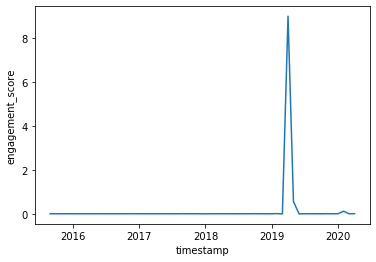

In [149]:
test = joint_df[joint_df['article_title']=="Anarchism"]
ax = sns.lineplot(x='timestamp', y='engagement_score', data=test)
plt.show()

In [157]:
test_df = joint_df[joint_df['article_title'] == "Anarchism"]


,article_title,timestamp,editor_score,content_score,engagement_score
165,Anarchism,2015-08-31,0.002898,0.001692,4.904011e-06
166,Anarchism,2015-09-30,0.010552,0.000826,8.720917e-06
167,Anarchism,2015-10-31,0.076233,0.007975,6.079457e-04
168,Anarchism,2015-11-30,0.032255,0.001025,3.306987e-05
169,Anarchism,2015-12-31,0.029490,-0.004076,-1.202157e-04
170,Anarchism,2016-01-31,0.026388,0.000343,9.056439e-06
171,Anarchism,2016-02-29,0.001043,0.006831,7.123911e-06
172,Anarchism,2016-03-31,-0.006627,0.000050,-3.346163e-07
173,Anarchism,2016-04-30,0.015314,-0.006288,-9.629869e-05
174,Anarchism,2016-05-31,0.010280,0.023554,2.421365e-04


In [194]:
articles = list(joint_df['article_title'].unique())
out_dict = {}

for article in articles:
    test_df = joint_df[joint_df['article_title'] == article][['timestamp', 'editor_score', 'content_score', 'engagement_score']]
    out_dict[article] = test_df.values.tolist()
    
    

In [197]:
import json
import datetime
 
def myconverter(o):
    if isinstance(o, datetime.datetime):
        return o.__str__()
    else:
        o.__str__()

score_outdir = "../website_data"

if not os.path.exists(score_outdir):
        os.makedirs(score_outdir, exist_ok=True)
        
with open(score_outdir + "/engagement_scores.json", 'w') as outfile:
    json.dump(out_dict, outfile, default=myconverter)
    
def line_prepender(filename, line):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line.rstrip('\r\n') + content)
        
line_prepender(score_outdir + "/engagement_scores.json", "data = ")

In [172]:
with open(score_outdir + "/article_titles.txt", 'w') as outfile:
    for name in article_titles:
        outfile.write(name + "\n")

In [174]:
print(article_titles)

['Anarchism', 'Autism', 'Albedo', 'A', 'Alabama', 'Achilles', 'Academy_Award_for_Best_Production_Design', 'Academy_Awards', 'Altruism', 'Ayn_Rand', 'Algeria', 'List_of_Atlas_Shrugged_characters', 'Alchemy', 'Alien', 'Astronomer', 'ASCII', 'Animation', 'Apollo', 'Andre_Agassi', 'Afroasiatic_languages', 'Andorra', 'Animal_Farm', 'Alaska', 'Aldous_Huxley', 'Algae', 'Analysis_of_variance', 'America_the_Beautiful', 'Assistive_technology', 'Abacus', 'Asphalt', 'Apollo_11', 'Apollo_8', 'A_Modest_Proposal', 'Alphabet', 'Anatomy', 'Andrei_Tarkovsky', 'Aardvark', 'Adobe', 'Adventure', 'Asia', 'Aruba', 'Articles_of_Confederation', 'Atlantic_Ocean', 'Angola', 'Android_(robot)', 'Alberta', 'Talk:Animal', 'Albert_Einstein', 'Albania', 'Allah', 'Azerbaijan', 'Ampere', 'Talk:American_football', 'Mouthwash', 'Asteroids_(video_game)', 'Aries_(constellation)', 'Aquarius_(constellation)', 'Ankara', 'Arabic', 'Anaconda', 'Talk:Afghanistan/Archive_6', 'Altaic_languages', 'Axiom_of_choice', 'Attila', 'Aegean

In [188]:
from engagement_score import selectArticlesDB

outfile = "../engagement_scores.db"
conn = sqlite3.connect(outfile)
c = conn.cursor()
sql_query = "SELECT * FROM SCORES"
c.execute(sql_query)
df = pd.DataFrame(c.fetchall(), columns=['article_title', 'timestamp', 'editor_score', 'content_score', 'engagement_score'])    
df

,article_title,timestamp,editor_score,content_score,engagement_score
0,Blizzard_Entertainment,2015-08-01 00:00:00,1.179937,0.019660,0.023197
1,Blizzard_Entertainment,2015-09-01 00:00:00,1.459123,-0.153639,-0.224178
2,Blizzard_Entertainment,2015-10-01 00:00:00,0.550742,0.000452,0.000249
3,Blizzard_Entertainment,2015-11-01 00:00:00,0.088596,0.036129,0.003201
4,Blizzard_Entertainment,2015-12-01 00:00:00,1.188823,-0.012127,-0.014416
...,...,...,...,...,...
107,American_League_Championship_Series,2019-11-01 00:00:00,1.745391,0.000000,0.000000
108,American_League_Championship_Series,2019-12-01 00:00:00,0.000000,0.000000,0.000000
109,American_League_Championship_Series,2020-01-01 00:00:00,0.000000,0.000000,0.000000
110,American_League_Championship_Series,2020-02-01 00:00:00,0.007757,-0.001927,-0.000015


In [193]:
joint_df = pd.concat([joint_df, df])